In [1]:
import numpy as np

class Bandit:
    def __init__(self, n):
        self.n = n
        self.q_star = np.random.normal(0, 1, size=n)
        
    def step(self, action):
        return np.random.normal(self.q_star[action], 1)
        
class EpsilonGreedyAgent:
    def __init__(self, n, epsilon):
        self.n = n
        self.epsilon = epsilon
        self.Q = np.zeros(n)
        self.N = np.zeros(n)
        
    def select_action(self):
        if np.random.uniform() < self.epsilon:
            # choose random action
            action = np.random.choice(self.n)
        else:
            # choose greedy action
            action = np.argmax(self.Q)
        return action
    
    def update(self, action, reward):
        self.N[action] += 1
        alpha = 1 / self.N[action]
        self.Q[action] += alpha * (reward - self.Q[action])


In [2]:
bandit = Bandit(10)
agent = EpsilonGreedyAgent(10, 0.1)

for i in range(1000):
    action = agent.select_action()
    reward = bandit.step(action)
    agent.update(action, reward)


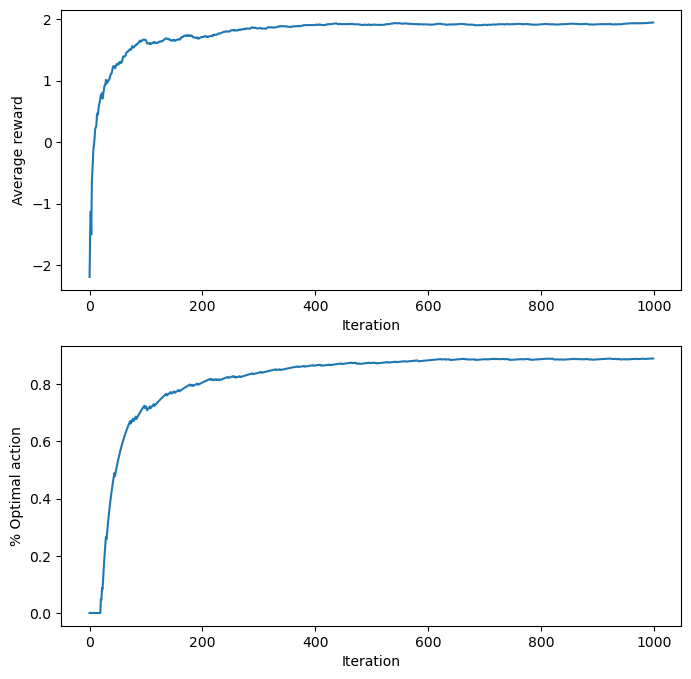

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of arms and the true action values
num_arms = 10
q_star = np.random.normal(0, 1, num_arms)

# Define the number of iterations and the epsilon parameter
num_iterations = 1000
epsilon = 0.1

# Initialize the estimated action values and action counts
Q = np.zeros(num_arms)
N = np.zeros(num_arms)

# Initialize the rewards and optimal action counts for plotting
rewards = np.zeros(num_iterations)
optimal_action_counts = np.zeros(num_iterations)

# Run the epsilon-greedy algorithm for the specified number of iterations
for i in range(num_iterations):
    # Choose an action using epsilon-greedy selection
    if np.random.random() < epsilon:
        action = np.random.randint(num_arms)
    else:
        action = np.argmax(Q)
    
    # Get the reward for the chosen action and update the estimated action value
    reward = np.random.normal(q_star[action], 1)
    N[action] += 1
    Q[action] += (reward - Q[action]) / N[action]
    
    # Track the rewards and optimal action counts for plotting
    rewards[i] = reward
    optimal_action_counts[i] = (action == np.argmax(q_star))
    
# Compute the average reward and optimal action percentage at each iteration
avg_rewards = np.cumsum(rewards) / np.arange(1, num_iterations+1)
optimal_action_perc = np.cumsum(optimal_action_counts) / np.arange(1, num_iterations+1)

# Plot the results
fig, ax = plt.subplots(2, 1, figsize=(8, 8))
ax[0].plot(avg_rewards)
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Average reward')
ax[1].plot(optimal_action_perc)
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('% Optimal action')
plt.show()
